In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [100]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(398, 30)
(398,)
(171, 30)
(398,)


## 1. 決定木

In [102]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set:{:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.947


In [103]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set:{:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set:0.937
Accuracy on test set:0.947


In [104]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:{:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set:{:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set:0.987
Accuracy on test set:0.965


In [105]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

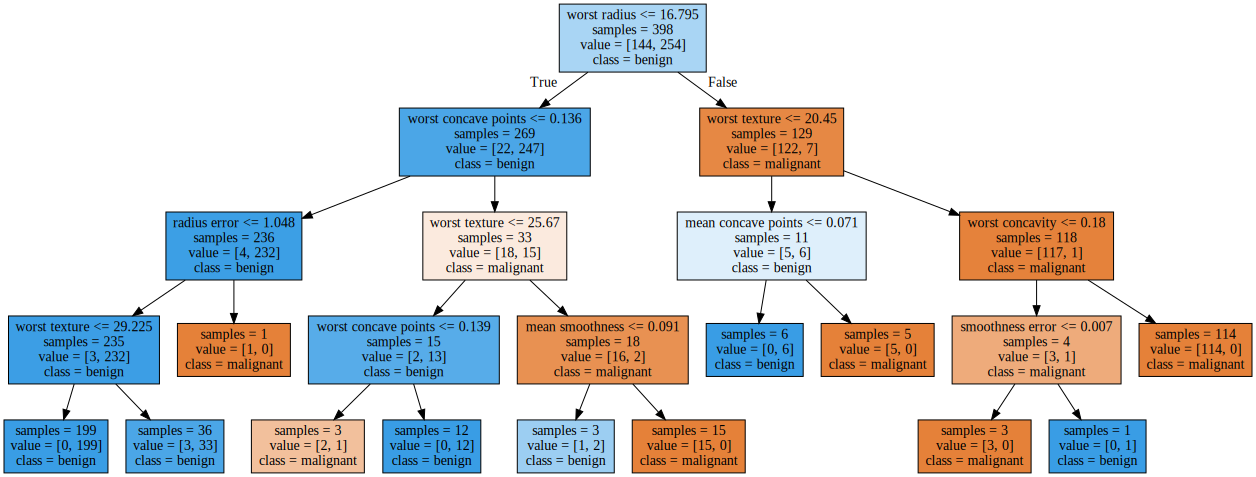

In [106]:
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [107]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.01265269 0.
 0.         0.03105661 0.         0.         0.01105151 0.
 0.         0.         0.00854057 0.         0.         0.
 0.         0.         0.74107768 0.08863705 0.         0.
 0.         0.         0.00275035 0.10423353 0.         0.        ]


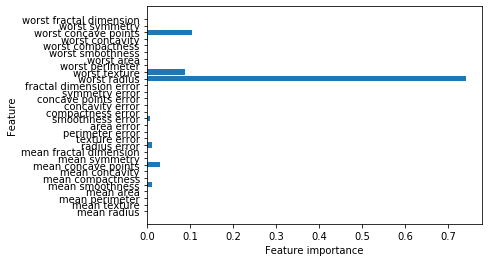

In [108]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # 特徴量の数
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer
               .feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances_cancer(tree)

## 2. ランダムフォレスト

In [109]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.959


In [110]:
forest = RandomForestClassifier(n_estimators=7, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.982


In [111]:
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.982


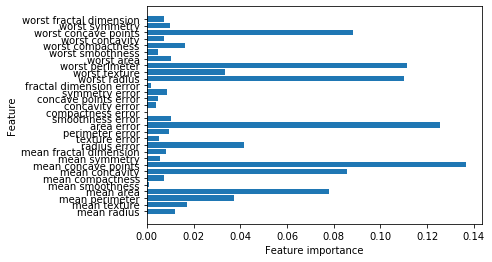

In [112]:
plot_feature_importances_cancer(forest)

## 3. 勾配ブースティング

In [113]:
# デフォルト値
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print('Accuracy Training set score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy Test set score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy Training set score: 1.000
Accuracy Test set score: 0.965


In [114]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print('Accuracy Training set score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy Test set score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy Training set score: 0.992
Accuracy Test set score: 0.982


In [115]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.7)
gbrt.fit(X_train, y_train)

print('Training set score: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(gbrt.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.977


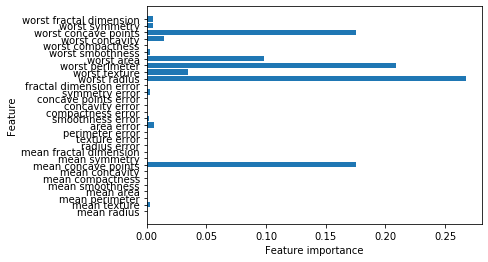

In [116]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)